# **Sensors and Sensing Course**
## Home Assignment 1

Nabila Adawy


B19-RO-01


n.roshdy@innopolis.university

### **To run the code:**


Upload this file to colab notebook and "case1.txt","data_set_1_.txt" to test the code.

### **Importing all the libraries we need.**

In [18]:
from skimage.measure import LineModelND, ransac
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import pyransac3d as pyrsc
import seaborn as sns
import numpy as np
import math

# **Task 1**

In this task we have measured values for the roll angle from a gyroscope. Our goal is to estimate the true value of the roll angle by applying Linear Regression. 

First of all, we will import our data from ('case1.txt') file and visualize it.

### **Data Loading and Vislualization.**

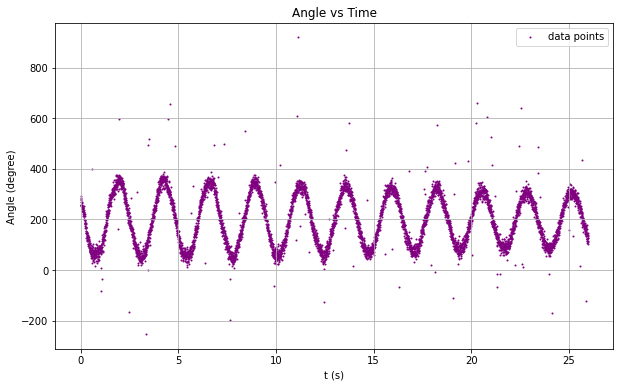

In [19]:
file = open('case1.txt', 'r')
time, angle = [], []

for i in file:
  point = i.strip().split(',')
  time.append(float(point[0]))
  angle.append(float(point[1]))

figure(figsize=(10,6))
scatter(time, angle , s=1, label="data points", color ='purple')
title('Angle vs Time')
ylabel('Angle (degree)')
xlabel('t (s)')
legend()
grid()
show()

After visualizing our data, we need to exclude from the consideration rare random deviation (outliers). So we need to know how our data is distributed.

### **Data Distribution Visualization**

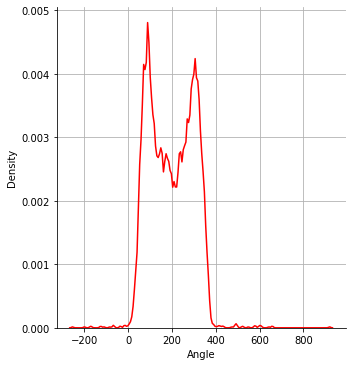

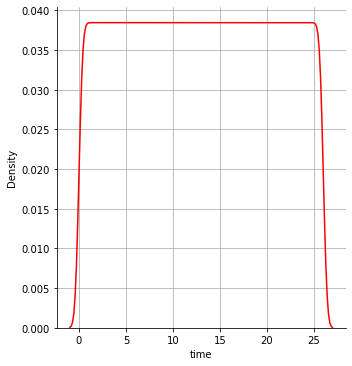

In [20]:
sns.displot(angle,kind="kde", color='red', bw_adjust=.25)
plt.xlabel("Angle")
grid()
sns.displot(time,kind="kde",color='red', bw_adjust=.25)
plt.xlabel("time")
grid()
show()

### **Excluding Rare Random Deviations (Outliers).**

As we can see from the previous plot that our data distrubution is bimodel, but for simplicity we will assume that our data is normaly distributed and we will follow the following approach to remove the outliers; in which we will remove the values that are out of the interval $[(mean-2*(standard deviation)), (mean+2*(standard deviation))]$. 

In [21]:
mean = np.mean(angle)
std = np.std(angle)
i = 0
while i != len(angle):
  if (angle[i] <= mean - 2*std) or (angle[i] >= mean + 2*std):
    angle.pop(i)
    time.pop(i)
  else:
    i += 1

### **Visualizing the data after removing the outliers.**

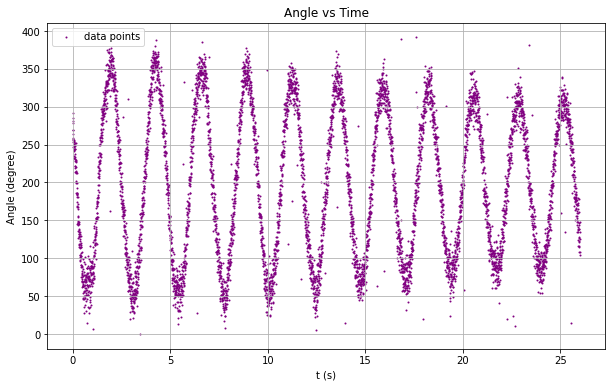

In [22]:
figure(figsize=(10,6))
scatter(time, angle , s=1, label="data points", color='purple')
title('Angle vs Time')
ylabel('Angle (degree)')
xlabel('t (s)')
legend()
grid()
show()

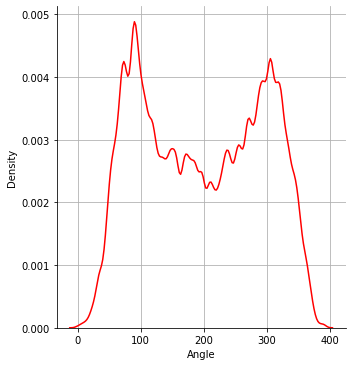

In [23]:
sns.displot(angle,kind="kde",color='r', bw_adjust=.25)
plt.xlabel("Angle")
grid()

### **Calculating the Confidence Interval**

Having 99.9% confidence level and considering the errors are normally distributed except for the rare random deviations, we can compute the condfidence interval as follows:

For 99.9%, P(0.999+0.001/2) = 0.9995, then z for probability 0.9995 is z = 3.27 

Standard Error: σx = σ/√n 

Margin of Error: ME = z*σx = z*σ/√n 

Then the Confidence Interval CI = $[mean − M E , mean + M E]$.

In [24]:
mean = np.mean(angle)
std = np.std(angle)
ME = 3.27 * std/math.sqrt(len(angle))
print(f"Confidence Interval = [{mean-ME},{mean+ME}]")

Confidence Interval = [193.3068060231371,201.13002716044153]


### **Linear Regression**

The main idea of linear regression is to find the $β$ vector such that:
- $y = \beta*x + \epsilon $


which can be calculated as follow:

- $\beta = (X^T X)(X^T Y)$

Then I got:
- $y = 0.434*x + 191.56 $



y = [0.43409407] * x + [191.57811477] 


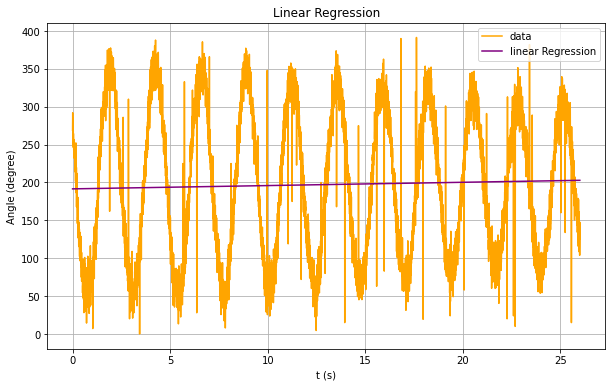

In [25]:
x = np.array(time)
x = np.vstack(time)
y = np.array(angle)
y = np.vstack(angle)

on = np.ones((len(x), 1), dtype=float)
X = np.hstack((on,x))
beta = np.array(np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y))
print(f"y = {beta[1]} * x + {beta[0]} ")
y_fit = np.dot(X , beta)

plt.figure(figsize=(10,6))
plt.plot(x,y, color = 'orange', label='data')
plt.plot(x, y_fit, color = 'purple', label='linear Regression' )
title('Linear Regression')
ylabel('Angle (degree)')
xlabel('t (s)')
legend()
grid()
show()

As we can see, the final result is not satisfying, because the linear regression is simple for the complexity of the problem and we need more complex 
model for this situation such as polynomial regression.


# **Task 2**


In this task we have to use RANSAC algorithm to estimate whether our dataset represents a plane, line or something else. 
I have used [pyransac3d](https://leomariga.github.io/pyRANSAC-3D/) module To solve this task.

First of all, I visualized the data in 3D. Then I implemented a planar RANSAC as long as we are in a 3D space.

In [26]:
!pip3 install pyransac3d
!pip install open3d

### **Data Loading.**

In [27]:
file = open('data_set_1_.txt')
X, Y, Z = [],[],[]
points = []
for i in file:
  point = i.strip().split(',')
  x = float(point[0])
  y = float(point[1])
  z = float(point[2])
  points.append([x, y, z])
  X.append(x)
  Y.append(y)
  Z.append(z)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
points = np.array(points)

### **Data Vislualization.**

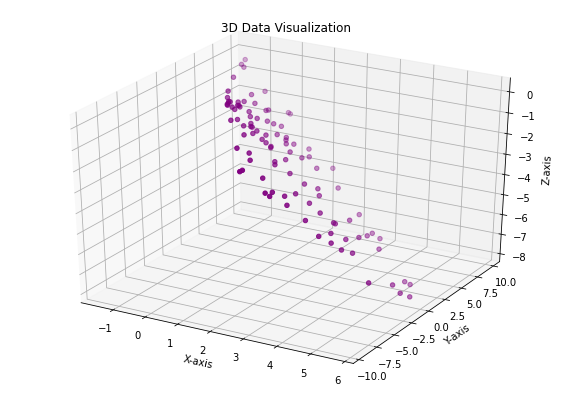

In [28]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2],color='purple')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title("3D Data Visualization")
show()

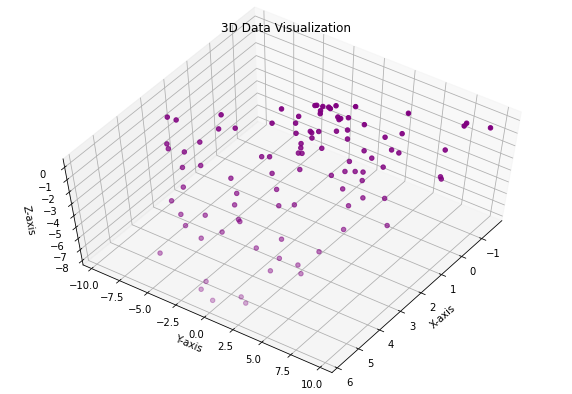

In [29]:
ax.view_init(60, 35)
# ax.view_init(20,40)
fig

### **Implementation of Planar RANSAC**

Calling Plane(), which finds the equation of an infinite plane using RANSAC algorithim.

Call fit() to randomly take 3 points of pointcloud to verify inliers based on a threshold.

The minimum points to draw a plane is three points and choosing the threshold randomly to be 3 and 100 itration, we can obtain satisfied results. 

The best equation of the fitted plane is:

$0.808x+0.162y+0.57z-0.16=0$

In [30]:
plane1 = pyrsc.Plane()
best_eq, best_inliers = plane1.fit(points, thresh=3, minPoints=3, maxIteration=100)
print('Best Parameters:',best_eq)

Best Parameters: [-0.8084518252425006, -0.1616901276567809, -0.565916909873175, 0.16169186273307945]


### **Visualization of the Obtained Plane.**

Plane Equation: -0.8084518252425006 x + -0.1616901276567809 y + -0.565916909873175 z 0.16169186273307945 = 0


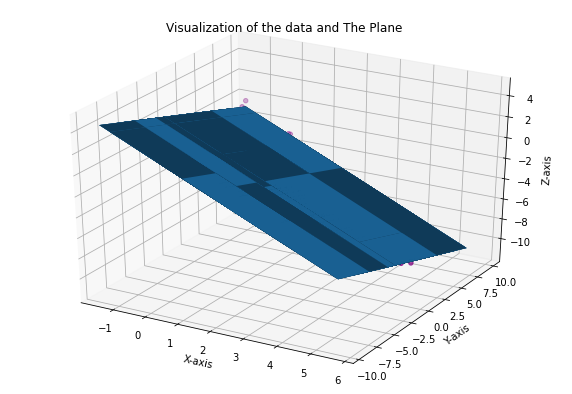

In [31]:
a,b,c,d = best_eq
x = points[:,0]
y = points[:,1]
X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c
print("Plane Equation:", f"{a} x + {b} y + {c} z {d} = 0")

fig = plt.figure(figsize = (10, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
ax.scatter(points[:,0],points[:,1],points[:,2],color='purple')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title("Visualization of the data and The Plane ")
show()

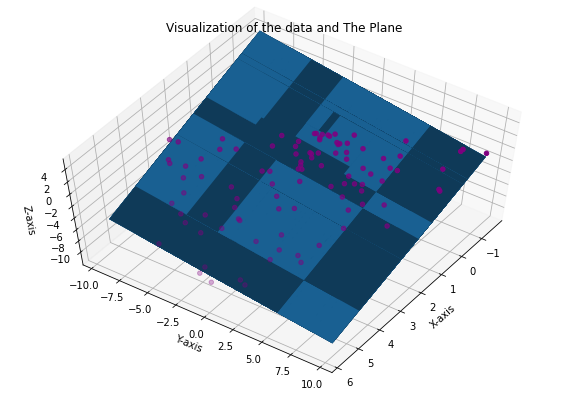

In [32]:
ax.view_init(60, 35)
# ax.view_init(20,40)
fig